### Preamble

In [85]:
import pandas as pd

### Load CSVs and show their description

In [86]:
train = pd.read_csv('./train.csv')
test  = pd.read_csv('./test.csv')

In [87]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Graphics

列が多すぎるため、視覚化する列は絞る

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# sns.pairplot(train)

![sns.pairplot(train)](./output.png)

<Axes: >

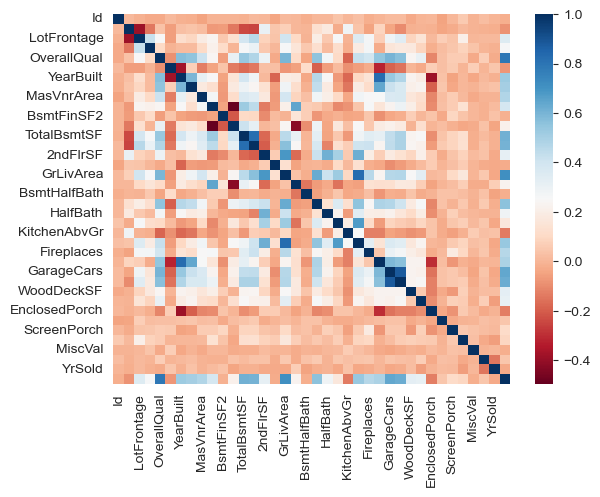

In [89]:
sns.heatmap(train.corr(numeric_only=True), cmap="RdBu")

`SalePrice` との相関係数が $\mathrm{corr} > 0.3, -0.3 < \mathrm{corr}$ であるような列を割り出す

In [90]:
(train.corr(numeric_only=True)["SalePrice"]
    .to_frame("SalePrice")
    .query("SalePrice > 0.3 | -0.3 > SalePrice")
    .sort_values("SalePrice").T)

,OpenPorchSF,2ndFlrSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
SalePrice,0.315856,0.319334,0.324413,0.351799,0.38642,0.466929,0.477493,0.486362,0.507101,0.522897,0.533723,0.560664,0.605852,0.613581,0.623431,0.640409,0.708624,0.790982,1.0


<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

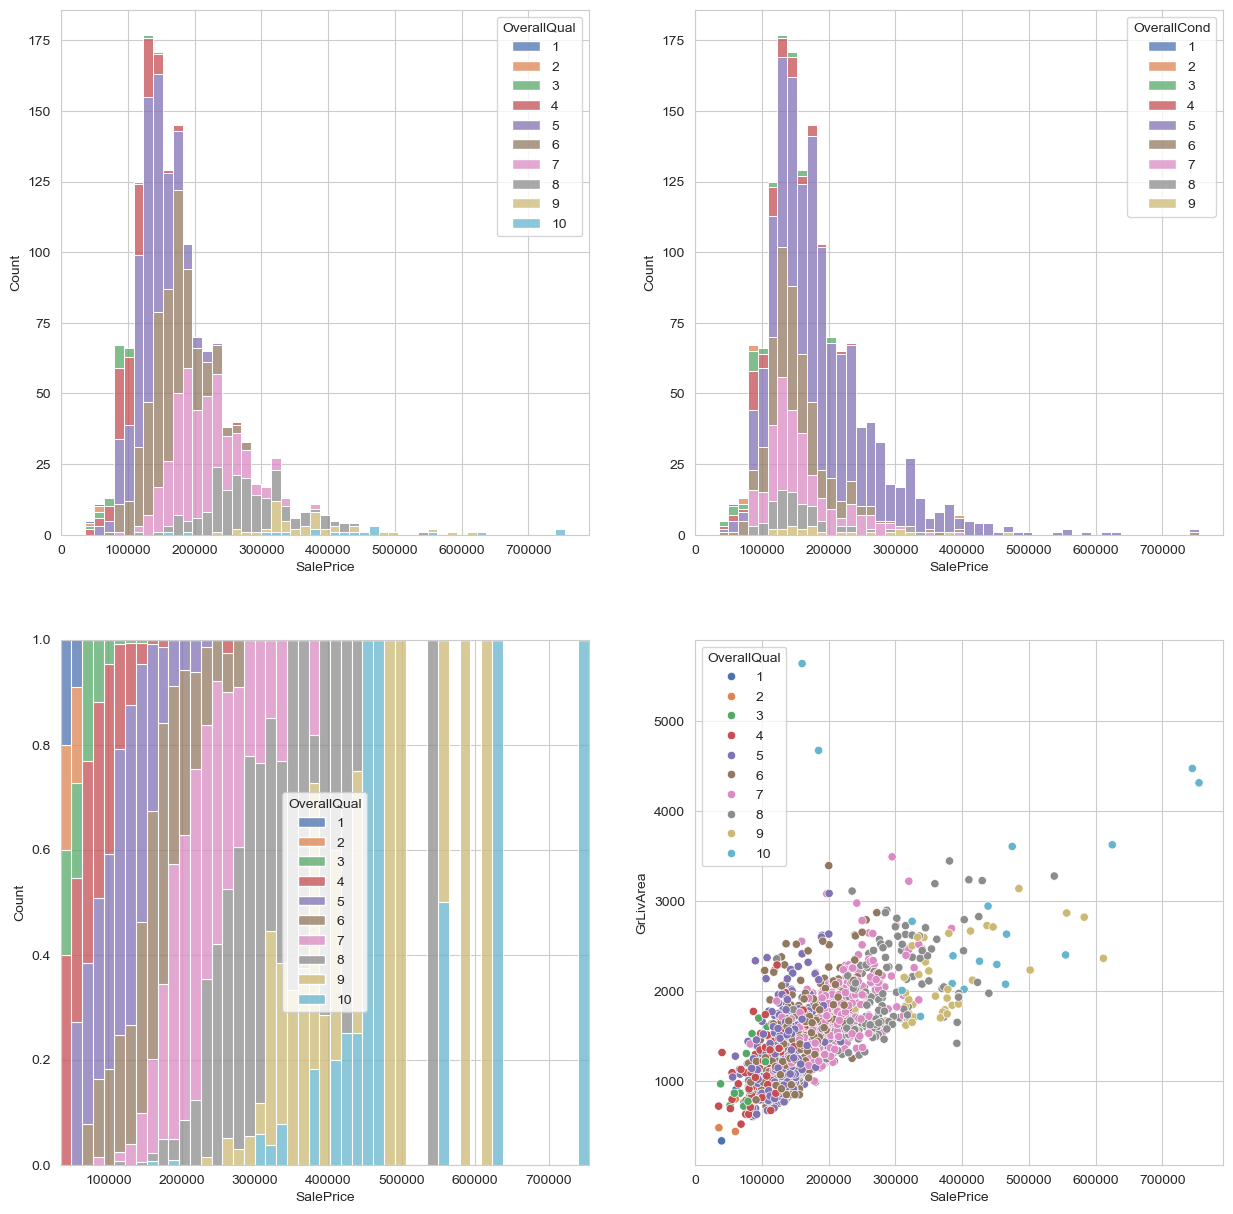

In [91]:
sns.set_palette("husl")
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(
    ax=axes[0, 0],
    data=train, x="SalePrice", hue="OverallQual", 
    multiple="stack", palette="deep"
)

sns.histplot(
    ax=axes[0, 1],
    data=train, x="SalePrice", hue="OverallCond",
    multiple="stack", palette="deep"
)

sns.histplot(
    ax=axes[1, 0],
    data=train, x="SalePrice", hue="OverallQual",
    multiple="fill", palette="deep",
)

sns.scatterplot(
    ax=axes[1, 1],
    data=train, x="SalePrice", y="GrLivArea", hue="OverallQual",
    palette="deep"
)

### Detect N/A values

LightGBM / GBDT は欠損値をそのまま扱えるので、ここではデータ解釈に留める

In [92]:
train.isna().sum().to_frame("NA").query("NA > 0").T

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
NA,259,1369,872,8,37,37,38,37,38,1,690,81,81,81,81,81,1453,1179,1406


In [93]:
test.isna().sum().to_frame("NA").query("NA > 0").T

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
NA,4,227,1352,2,1,1,894,15,44,45,...,78,78,1,1,78,78,1456,1169,1408,1


### Mark categorical features

In [94]:
categorical_features = [
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
]

In [95]:
def preprocess(df: pd.DataFrame):
    df = df.drop('Id', axis=1)

    for feature in categorical_features:
        df[feature] = df[feature].astype("category")
    
    return df

train = preprocess(train)
test = preprocess(test)

### LightGBM

Preparation

In [96]:
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, train_size=0.3
)

Start learning and evaluate the model

In [97]:
import lightgbm as lgb

model = lgb.LGBMRegressor(
    boosting_type="gbdt", n_estimators=80, min_child_samples=8,
    random_state=42, force_row_wise=True
)

callbacks = [lgb.early_stopping(stopping_rounds=10)]
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, callbacks=callbacks, eval_set=eval_set)
y_pred = model.predict(X_test)

[LightGBM] [Info] Total Bins 1774
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 75
[LightGBM] [Info] Start training from score 180951.458904
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[80]	valid_0's l2: 1.06902e+09


### Evaluate

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False) # type: ignore
r2 = r2_score(y_test, y_pred) # type: ignore

print(f"mse: {rmse}")
print(f" r2: {r2}")

mse: 32695.899708250497
 r2: 0.8418083267541098
